In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [19]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X, Y = gaussian_quantiles
Y = Y.reshape(-1,1)

In [20]:
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

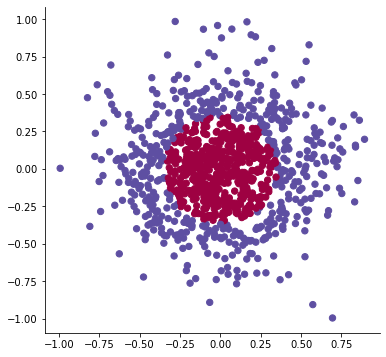

In [21]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()

### Función de Activación

In [22]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

### Función de Pérdida

In [23]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [24]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [25]:
layers_dim = [2,4,8,1]
params = initialize_parameters_deep(layers_dim)
print(params)

{'W1': array([[-0.63020223,  0.20538744, -0.95916551, -0.86369569],
       [ 0.47270103, -0.49249245,  0.71487473, -0.94137145]]), 'b1': array([[-0.6132489 , -0.45204681,  0.44053571,  0.27304801]]), 'W2': array([[ 0.24207573, -0.14164942,  0.83588792,  0.57925968, -0.76118335,
         0.97199071,  0.56479943,  0.19422998],
       [ 0.75665266, -0.28783879, -0.31972539,  0.94272055, -0.09930113,
         0.04827089, -0.54701738,  0.22792646],
       [-0.62171314,  0.46373348,  0.60172452, -0.6548842 ,  0.6537084 ,
         0.96646419,  0.04196206, -0.04684832],
       [-0.27048361,  0.05987104,  0.98797826, -0.41547229,  0.23554663,
        -0.67687671, -0.99128415,  0.79731223]]), 'b2': array([[ 0.09603413, -0.58346206,  0.54803685,  0.24094137, -0.26951491,
         0.63370063,  0.17221181,  0.82615384]]), 'W3': array([[ 0.75651144],
       [ 0.67360315],
       [-0.4532202 ],
       [-0.22224699],
       [ 0.85494192],
       [-0.92996638],
       [ 0.65768917],
       [ 0.58922805

In [26]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

In [27]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(60000):
    output = train(X,0.0001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.2559737929907078
0.2549581710475981
0.25397934294800023
0.25302508320481404
0.2520618044020038
0.251157212190329
0.2503438596291197
0.24962001203093045
0.24896098538861156
0.24834486810417286
0.24775531609921972
0.24718212036366446
0.24661917828708604
0.246056899050299
0.2454897771448867
0.2449224499205576
0.24434643893681057
0.2437606496616372
0.24316551246231757
0.2425606506219089
0.2419430174437388
0.24131244126165408
0.24066786853305236
0.24000816918829151
0.23933001999363687
0.23863962818868328
0.23793735567002072
0.237227716378076
0.23651067281173063
0.23578689059080532
0.23505869765920054
0.23432591716644943
0.23358748469303367
0.23284523027507925
0.23209776505897875
0.23135315266589776
0.2306101963836131
0.22986636815840447
0.2291195439938798
0.22836953184479758
0.22761850051096238
0.2268694668652812
0.2261201805970294
0.2253740998799505
0.2246265160638876
0.22387570644960186
0.2231182213168035
0.22235369081757633
0.2215768584618351
0.22077990206231835
0.21997059018640258
0.2

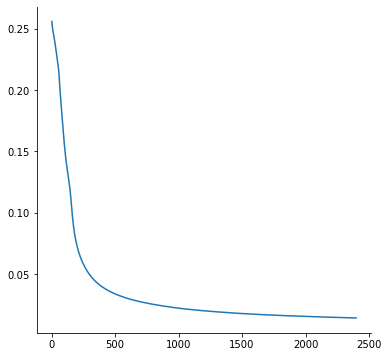

In [28]:
plt.plot(errors)

In [32]:
data_test = (np.random.rand(1000,2) * 2) - 1
y = train(data_test, 0.0001, params, training=False)
y = np.where(y >= 0.5, 1, 0)

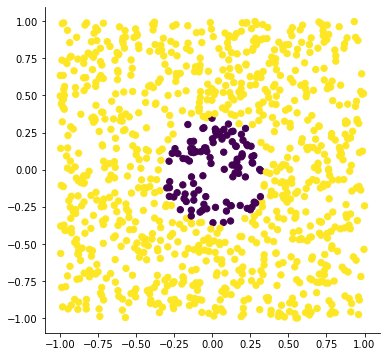

In [33]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

In [37]:
y_pred = train(X, 0.0001, params, training=False)
y_pred = np.where(y_pred >= 0.5, 1, 0)
accuracy_score(Y, y_pred)

0.993

In [36]:
an_array = (Y == y_pred)
np.unique(an_array, return_counts=True)

(array([False,  True]), array([  7, 993], dtype=int64))